<a href="https://colab.research.google.com/github/jamesaje/Portfolio_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# @title
# import os
# os.chdir("/content/drive/MyDrive/dataset/housing")
# !pwd
# !ls

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Load Dataset

In [ ]:
#housing = pd.read_csv('/content/drive/MyDrive/dataset/housing/housing.csv')
housing = pd.read_csv('housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

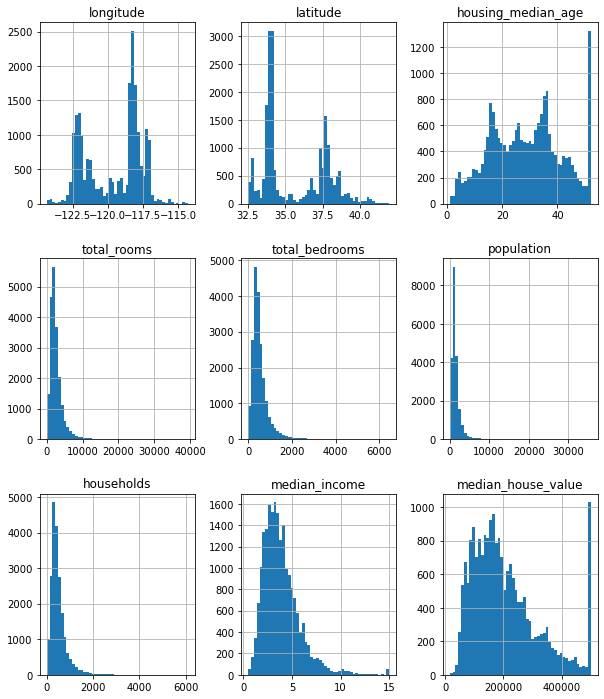

In [ ]:
housing.hist(bins=50, figsize=(10, 12))
plt.show()

In [ ]:
X_train, X_test = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
X_test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY


In [ ]:
X_train.shape, X_test.shape

((16512, 10), (4128, 10))

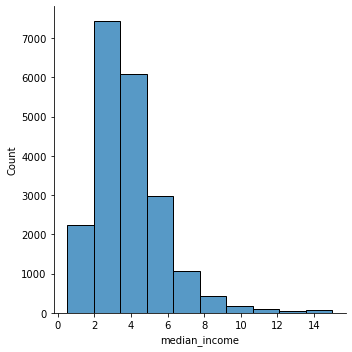

In [ ]:
# Median income is a very important attribute so let's understand it
sns.displot(data=housing, x='median_income', bins=10);

In [ ]:
# Divide median income by 1.5 to limit the no of categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

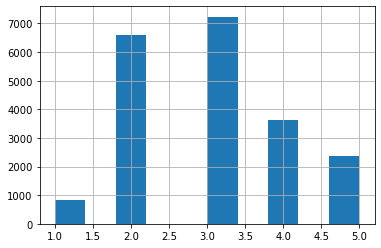

In [ ]:
housing["income_cat"].hist()

In [ ]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random" : income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

## Visualize the Data

In [ ]:
housing1 = strat_train_set.copy()

In [ ]:
housing1.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

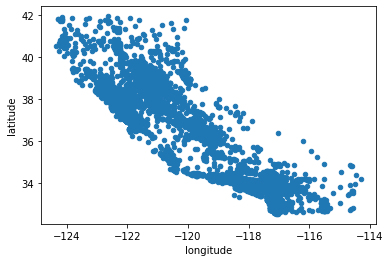

In [ ]:
housing1.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

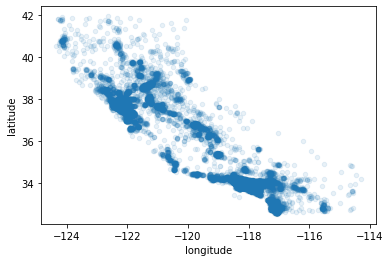

In [ ]:
# Plot with alpha option to show density
housing1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

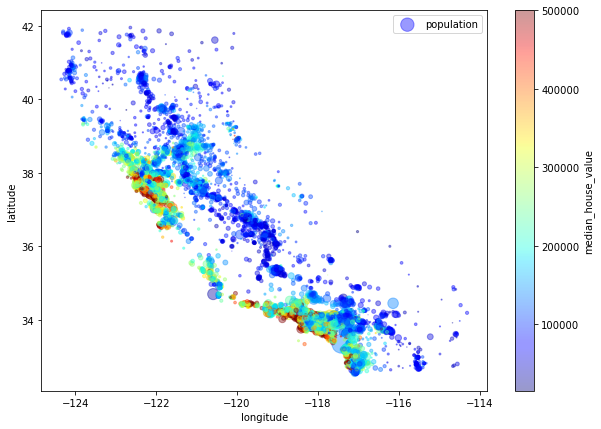

In [ ]:
housing1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
              s=housing1["population"]/100, label="population", figsize=(10, 7),
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
              sharex=False)
plt.legend()

In [ ]:
# See if there is any correlation
corr_matrix = housing1.iloc[:, :-1].corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

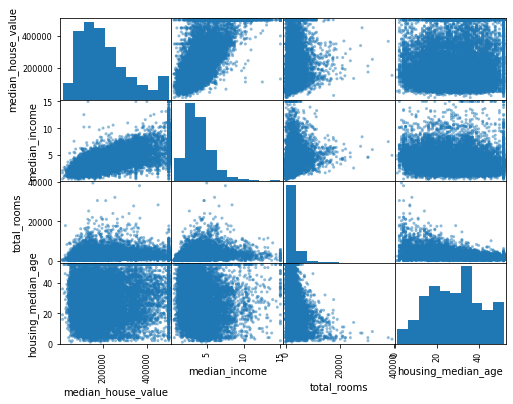

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing1[attributes], figsize=(8, 6))

(0.0, 16.0, 0.0, 550000.0)

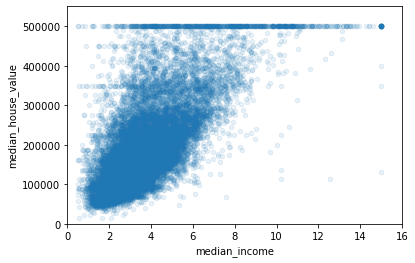

In [ ]:
# There is correlation between median_income and median house value
housing1.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

### Feature Engineering

In [ ]:
# Feature engineer rooms per household
housing1["rooms_per_household"] = housing1["total_rooms"] / housing1["households"]
housing1["bedrooms_per_room"] = housing1["total_bedrooms"] / housing1["total_rooms"]
housing1["population_per_household"] = housing1["population"] / housing["households"]

In [ ]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
housing_tmp = housing1.drop(columns=["ocean_proximity"], axis=1)

In [ ]:
corr_mat = housing_tmp.corr()
corr_mat["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

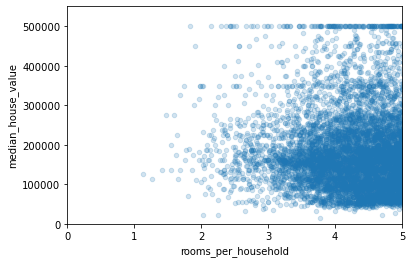

In [ ]:
housing1.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 550000])
plt.show()

### Prepare Data for Machine Learning

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [ ]:
housing = strat_train_set.drop(columns=["median_house_value"], axis=1)
target = strat_train_set["median_house_value"]

In [ ]:
housing.shape, target.shape

((16512, 9), (16512,))

In [ ]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
housing[housing.isna().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# remove text attribute "ocean_proximity"
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
housing_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750


In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
X.shape

(16512, 8)

In [ ]:
# Convert imputed data to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(3)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
# apply onehotencoding to the ocean_proximity feature
housing_cat_onehot = encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_onehot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# get the column indices
room_i, bedroom_i, population_i, household_i = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")
]

In [ ]:
room_i, bedroom_i, population_i, household_i

(3, 4, 5, 6)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
  rooms_per_household = X[:, room_i] / X[:, household_i]
  population_per_household = X[:, population_i] / X[:, household_i]
  if add_bedrooms_per_room:
    bedrooms_per_room = X[:, bedroom_i] / X[:, room_i]
    return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]
  else:
    return np.c_[X, rooms_per_household, population_per_household]


In [ ]:
# @title
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.pipeline import Pipeline

# # Define your custom transformer for feature engineering
# class FeatureAdder(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         rooms_per_household = X[:, room_i] / X[:, household_i]
#         bedrooms_per_room = X[:, bedroom_i] / X[:, room_i]
#         population_per_household = X[:, population_i] / X[:, household_i]

#         return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]

In [ ]:
# Create your preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('feat_add', FunctionTransformer(add_extra_features, validate=False))
])

# Apply the preprocessing pipeline to your housing data
housing_processed = preprocessing_pipeline.fit_transform(X)

In [ ]:
housing_processed_df = pd.DataFrame(
    housing_processed, columns=list(housing_num.columns)+["rooms_per_household", "bedrooms_per_room", "population_per_household"],
    index=housing_num.index)
housing_processed_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241


In [ ]:
# Pipeline for preprocessing numeric features
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('feat_add', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ]
)

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr.shape

(16512, 11)

In [ ]:
housing_processed_df2 = pd.DataFrame(
    housing_num_tr, columns=list(housing_num.columns)+["rooms_per_household", "bedrooms_per_room", "population_per_household"],
    index=housing_num.index)
housing_processed_df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,-0.121122,0.006223
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.810867,-0.040811
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.338273,-0.075371
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,0.961205,-0.106803
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,-0.474513,0.006109


In [ ]:
#Column transformer for categorical feature
cat_feat = housing.select_dtypes(exclude='float64').columns.tolist()
categorical_transformer = Pipeline(
        steps=[
            ("ohe", OneHotEncoder(sparse_output=False)),
        ])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cat_feat)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [ ]:
cat_preprocess = preprocessor.fit_transform(housing)

In [ ]:
cat_preprocess.head(3)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0


In [ ]:
combine_df = pd.merge(left=housing_processed_df2, left_index=True, right=cat_preprocess, right_index=True, how='inner')

In [ ]:
combine_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,-0.121122,0.006223,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.810867,-0.040811,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.338273,-0.075371,0.0,1.0,0.0,0.0,0.0


In [ ]:
combine_df.shape

(16512, 16)

In [ ]:
# Full pipeline
num_feat = list(housing_num)
cat_feat = housing.select_dtypes(exclude='float64').columns.tolist()

full_pipe = ColumnTransformer([
    ("num", num_pipeline, num_feat),
    ("cat", OneHotEncoder(), cat_feat),
])

housing_processor = full_pipe.fit_transform(housing)

In [ ]:
housing_processor.shape

(16512, 16)

In [ ]:
housing_processor

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## Model fitting

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(housing_processor, target)

LinearRegression()

In [ ]:
# Try the model on a few instances
some_data = housing.iloc[:5]
some_target = target.iloc[:5]
some_processed_data = full_pipe.transform(some_data)

In [ ]:
print("Predictions:", lr.predict(some_processed_data))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
print("Target:", list(some_target))

Target: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
some_processed_data

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12112176,
         0.00622264,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.81086696,
        -0.04081077,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.33827252,
        -0.07537122,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997,  0.96120521,
        -0.10680295,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

house_prediction = lr.predict(housing_processor)
mse = mean_squared_error(target, house_prediction)
rmse = np.sqrt(mse)
rmse

68627.87390018743

In [ ]:
mae = mean_absolute_error(target, house_prediction)
mae

49438.66860915802

In [ ]:
# Let us train another model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(housing_processor, target)

DecisionTreeRegressor(random_state=42)

In [ ]:
house_prediction_dt = dt.predict(housing_processor)
mse = mean_squared_error(target, house_prediction_dt)
rmse = np.sqrt(mse)
rmse

0.0

In [ ]:
# Fine tune the model using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, housing_processor, target, scoring='neg_mean_squared_error', cv=10)
rmse_score = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_score)

Scores: [72604.07357161 70762.06014333 69152.46596417 70707.16549011
 69634.3819741  78255.01303574 69436.39192792 73522.01901137
 69512.40878932 70855.80285667]
Mean: 71444.17827643351
Standard deviation: 2639.984002113727


In [ ]:
# Cross validate the regression model

In [ ]:
lr_score = cross_val_score(lr, housing_processor, target, scoring='neg_mean_squared_error', cv=10)
lr_rmse_score = np.sqrt(-lr_score)
display_scores(lr_rmse_score)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


In [ ]:
# Let us train useing the RandomForestRegressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(housing_processor, target)

RandomForestRegressor(random_state=42)

In [ ]:
rfr_prediction = rfr.predict(housing_processor)
rfr_mse = mean_squared_error(target, rfr_prediction)
rfr_rmse = np.sqrt(rfr_mse)
rfr_rmse

18656.724889687026

In [ ]:
# cross validate random forest model

rfr_score = cross_val_score(rfr, housing_processor, target, scoring='neg_mean_squared_error', cv=10)
rfr_rmse_score = np.sqrt(-rfr_score)
display_scores(rfr_rmse_score)

Scores: [51425.78894761 48686.43325001 47126.63706616 51936.6539622
 47513.47437032 51822.56627035 52456.70398283 50099.3119716
 48676.30035937 54337.82787921]
Mean: 50408.16980596742
Standard deviation: 2240.934966386524


In [ ]:
# Train model with SVR

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(housing_processor, target)
svr_prediction = svr.predict(housing_processor)
svr_mse = mean_squared_error(target, svr_prediction)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

111095.06635291968

### Fine Tune Model

In [ ]:
# Apply GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]},
]

In [ ]:
rfr = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rf_grid_search.fit(housing_processor, target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
rf_grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
rf_grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
cv_res = rf_grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

64107.72493467689 {'max_features': 2, 'n_estimators': 3}
55300.66840276146 {'max_features': 2, 'n_estimators': 10}
52917.6641920337 {'max_features': 2, 'n_estimators': 30}
60387.77605331988 {'max_features': 4, 'n_estimators': 3}
52500.99780781293 {'max_features': 4, 'n_estimators': 10}
50660.36768324297 {'max_features': 4, 'n_estimators': 30}
57925.65563629126 {'max_features': 6, 'n_estimators': 3}
51763.8210808613 {'max_features': 6, 'n_estimators': 10}
50030.31500370757 {'max_features': 6, 'n_estimators': 30}
58962.84890218076 {'max_features': 8, 'n_estimators': 3}
51942.15188198377 {'max_features': 8, 'n_estimators': 10}
49941.73466161617 {'max_features': 8, 'n_estimators': 30}
62276.25933943302 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54242.57366967792 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58054.355210028734 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51791.54028630885 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [ ]:
cvres_df = pd.DataFrame(rf_grid_search.cv_results_)
cvres_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.110540,0.005681,0.004848,0.000432,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.290226e+09,-3.660285e+09,...,-4.109800e+09,2.591550e+08,18,-1.168073e+09,-1.110402e+09,-1.149418e+09,-1.157961e+09,-1.055193e+09,-1.128209e+09,4.140693e+07
1,0.348596,0.016619,0.009910,0.005084,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.119453e+09,-2.865102e+09,...,-3.058164e+09,9.890690e+07,11,-5.624888e+08,-5.873312e+08,-5.826026e+08,-5.755146e+08,-5.793513e+08,-5.774577e+08,8.430702e+06
2,1.005147,0.015645,0.031551,0.000589,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.879693e+09,-2.664676e+09,...,-2.800279e+09,8.566172e+07,9,-4.330089e+08,-4.353377e+08,-4.388946e+08,-4.285736e+08,-4.299466e+08,-4.331523e+08,3.715161e+06
3,0.166477,0.006887,0.000923,0.001846,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.679357e+09,-3.551754e+09,...,-3.646683e+09,6.572572e+07,16,-9.752814e+08,-9.661613e+08,-9.483513e+08,-9.563406e+08,-9.672390e+08,-9.626747e+08,9.350909e+06
4,0.536999,0.016092,0.009374,0.007653,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.741784e+09,-2.663604e+09,...,-2.756355e+09,8.330164e+07,8,-5.148926e+08,-5.229979e+08,-4.971102e+08,-5.241160e+08,-5.243391e+08,-5.166912e+08,1.039273e+07
5,1.814849,0.162329,0.035865,0.011804,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.536603e+09,-2.470026e+09,...,-2.566473e+09,7.972266e+07,3,-3.856159e+08,-3.986960e+08,-3.827819e+08,-3.925138e+08,-3.976610e+08,-3.914537e+08,6.346434e+06
6,0.260912,0.069786,0.002617,0.002148,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.430520e+09,-3.373176e+09,...,-3.355382e+09,7.903848e+07,12,-8.885774e+08,-9.088091e+08,-9.258181e+08,-8.291483e+08,-8.806316e+08,-8.865969e+08,3.277663e+07
7,0.786518,0.042159,0.007268,0.007072,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.668669e+09,-2.672987e+09,...,-2.679493e+09,4.771742e+07,5,-4.887365e+08,-5.178828e+08,-5.023366e+08,-4.870314e+08,-4.993074e+08,-4.990589e+08,1.110276e+07
8,2.469485,0.166116,0.031572,0.009891,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.469780e+09,-2.497462e+09,...,-2.503032e+09,7.312910e+07,2,-3.715408e+08,-3.922581e+08,-3.824632e+08,-3.770732e+08,-3.827604e+08,-3.812192e+08,6.879541e+06
9,0.346441,0.014684,0.003124,0.006248,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.355064e+09,-3.176507e+09,...,-3.476618e+09,1.837516e+08,14,-9.232714e+08,-8.944361e+08,-9.454610e+08,-9.007576e+08,-9.375084e+08,-9.202869e+08,1.994431e+07


In [ ]:
# Using Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_param_grid = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

rf_reg = RandomForestRegressor(random_state=42)
rscv = RandomizedSearchCV(rf_reg, random_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rscv.fit(housing_processor, target)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A37C1525E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A37C152580>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rscv_res = rscv.cv_results_
for mean_score, params in zip(rscv_res["mean_test_score"], rscv_res["params"]):
    print(np.sqrt(-mean_score), params)

49137.912486209374 {'max_features': 7, 'n_estimators': 180}
51924.931503575535 {'max_features': 5, 'n_estimators': 15}
50456.510948786534 {'max_features': 3, 'n_estimators': 72}
50937.604787777826 {'max_features': 5, 'n_estimators': 21}
49224.84004647947 {'max_features': 7, 'n_estimators': 122}
50435.66256024766 {'max_features': 3, 'n_estimators': 75}
50325.69985917949 {'max_features': 3, 'n_estimators': 88}
49656.51173475566 {'max_features': 5, 'n_estimators': 100}
50245.71486831595 {'max_features': 3, 'n_estimators': 150}
64761.075867445616 {'max_features': 5, 'n_estimators': 2}


In [ ]:
# Get feature importance of the GridSearchCV

In [ ]:
feat_imp = rf_grid_search.best_estimator_.feature_importances_
feat_imp

array([6.45880391e-02, 5.94713713e-02, 4.41991316e-02, 1.58063664e-02,
       1.50626556e-02, 1.52021921e-02, 1.41110781e-02, 3.69176582e-01,
       5.71500578e-02, 5.43783767e-02, 1.13500554e-01, 5.51020371e-03,
       1.65659423e-01, 1.14538427e-04, 2.69583739e-03, 3.37359363e-03])

In [ ]:
features = combine_df.columns
sorted(zip(feat_imp, features), reverse=True)

[(0.3691765815439403, 'median_income'),
 (0.16565942296071298, 'ocean_proximity_INLAND'),
 (0.11350055362084392, 'population_per_household'),
 (0.06458803910452832, 'longitude'),
 (0.05947137128182693, 'latitude'),
 (0.05715005781696603, 'rooms_per_household'),
 (0.054378376723993496, 'bedrooms_per_room'),
 (0.044199131636963936, 'housing_median_age'),
 (0.015806366404696095, 'total_rooms'),
 (0.01520219208740975, 'population'),
 (0.015062655560537618, 'total_bedrooms'),
 (0.014111078105004001, 'households'),
 (0.0055102037084365976, 'ocean_proximity_<1H OCEAN'),
 (0.00337359362542473, 'ocean_proximity_NEAR OCEAN'),
 (0.0026958373917216347, 'ocean_proximity_NEAR BAY'),
 (0.00011453842699376419, 'ocean_proximity_ISLAND')]

In [ ]:
final_model = rf_grid_search.best_estimator_

# Evaluate on Test Set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_processed = full_pipe.transform(X_test)
final_pred = final_model.predict(X_test_processed)

f_mse = mean_squared_error(y_test, final_pred)
f_rmse = np.sqrt(f_mse)

In [ ]:
f_rmse

48322.90670053635

In [ ]:
# Compute a 95% confidence interval for RMSE

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_pred - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                        loc = np.mean(squared_errors),
                        scale = stats.sem(squared_errors)))

array([46313.52501536, 50252.00518018])

In [ ]:
# Using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46314.12710305431, 50251.450274191855)

In [ ]:
# Full pipeline with preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
    ("prep", full_pipe),
    ("lin", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, target)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])